RFE NEE

Optimal number of features: 23
Selected features: ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad', 'tmean_C', 'vap', 'vs', 'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm', 'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm', 'silt_0_100cm', 'soc_0_100cm', 'co2_cont']


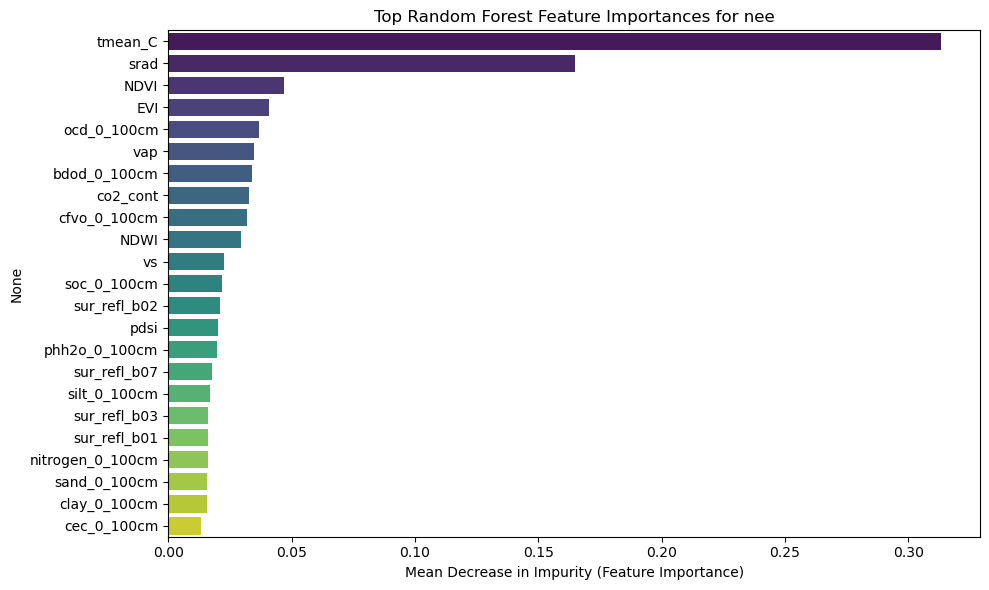

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
# --- CHANGE 1: Import root_mean_squared_error instead of mean_squared_error ---
from sklearn.metrics import make_scorer, root_mean_squared_error
import warnings
import os
warnings.filterwarnings('ignore')


# 1. Load your dataset
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")
df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_var = 'nee'

out_path = os.path.join("/explore/nobackup/people/spotter5/anna_v/v2/loocv", target_var)
os.makedirs(out_path, exist_ok = True)

# 4. Drop rows with missing predictor or target values
df_model = df[predictor_vars + [target_var]].dropna()

# 5. Prepare input data
X = df_model[predictor_vars]
y = df_model[target_var]

# 6. Set up scoring, model, and cross-validation
# --- CHANGE 2: Use the new function to create the scorer ---
# Since RMSE is an error metric (lower is better), we set greater_is_better=False
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 7. Run RFECV
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring=rmse_scorer, n_jobs=-1)
rfecv.fit(X, y)

# 8. Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    # Note: RFECV stores scores, so we negate our scorer's output to plot positive RMSE
    -rfecv.cv_results_['mean_test_score'],
    marker='o'
)
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated RMSE (NEE)")
plt.title(f"{target_var} RMSE vs Number of Features (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(out_path, 'rfe.png'))
plt.show()

# 9. Print selected features
selected_features = list(X.columns[rfecv.support_])
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features)

# 10. Train full model and compute feature importances
full_rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
full_rf.fit(X, y)
full_importances = pd.Series(full_rf.feature_importances_, index=X.columns)
top_10_features = full_importances.sort_values(ascending=False).head(40)

# 11. Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.xlabel("Mean Decrease in Impurity (Feature Importance)")
plt.title(f"Top Random Forest Feature Importances for {target_var}")
plt.savefig(os.path.join(out_path, 'rf_importance.png'))
plt.tight_layout()
plt.show()

In [9]:
df_model.shape

(5105, 24)

RFE GPP

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
# --- CHANGE 1: Import root_mean_squared_error instead of mean_squared_error ---
from sklearn.metrics import make_scorer, root_mean_squared_error
import warnings
import os
warnings.filterwarnings('ignore')


# 1. Load your dataset
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")
df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_var = 'gpp'

out_path = os.path.join("/explore/nobackup/people/spotter5/anna_v/v2/loocv", target_var)
os.makedirs(out_path, exist_ok = True)

# 4. Drop rows with missing predictor or target values
df_model = df[predictor_vars + [target_var]].dropna()

# 5. Prepare input data
X = df_model[predictor_vars]
y = df_model[target_var]

# 6. Set up scoring, model, and cross-validation
# --- CHANGE 2: Use the new function to create the scorer ---
# Since RMSE is an error metric (lower is better), we set greater_is_better=False
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 7. Run RFECV
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring=rmse_scorer, n_jobs=-1)
rfecv.fit(X, y)

# 8. Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    # Note: RFECV stores scores, so we negate our scorer's output to plot positive RMSE
    -rfecv.cv_results_['mean_test_score'],
    marker='o'
)
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated RMSE (NEE)")
plt.title(f"{target_var} RMSE vs Number of Features (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(out_path, 'rfe.png'))
plt.show()

# 9. Print selected features
selected_features = list(X.columns[rfecv.support_])
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features)

# 10. Train full model and compute feature importances
full_rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
full_rf.fit(X, y)
full_importances = pd.Series(full_rf.feature_importances_, index=X.columns)
top_10_features = full_importances.sort_values(ascending=False).head(40)

# 11. Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.xlabel("Mean Decrease in Impurity (Feature Importance)")
plt.title(f"Top Random Forest Feature Importances for {target_var}")
plt.savefig(os.path.join(out_path, 'rf_importance.png'))
plt.tight_layout()
plt.show()

Optimal number of features: 22
Selected features: ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad', 'tmean_C', 'vap', 'vs', 'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm', 'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm', 'silt_0_100cm', 'soc_0_100cm', 'co2_cont']


RFE RECO

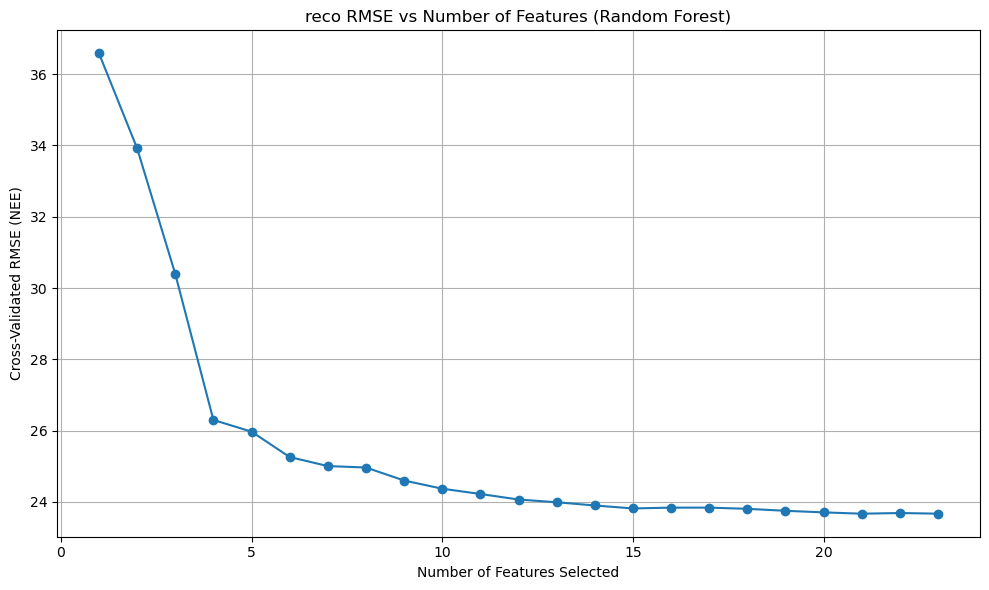

Optimal number of features: 21
Selected features: ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad', 'tmean_C', 'vap', 'vs', 'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm', 'silt_0_100cm', 'soc_0_100cm', 'co2_cont']


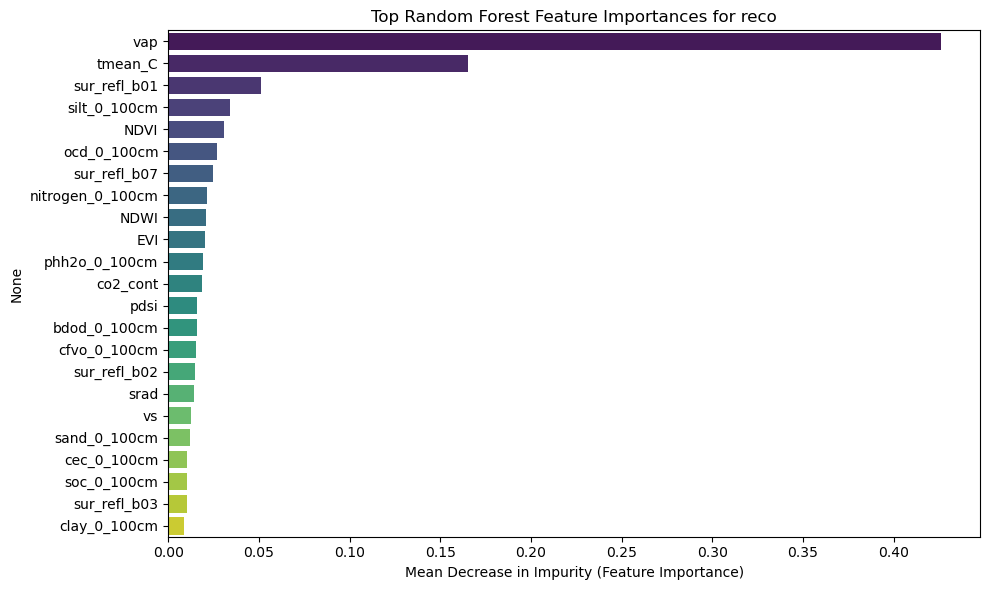

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
# --- CHANGE 1: Import root_mean_squared_error instead of mean_squared_error ---
from sklearn.metrics import make_scorer, root_mean_squared_error
import warnings
import os
warnings.filterwarnings('ignore')


# 1. Load your dataset
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")
df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_var = 'reco'

out_path = os.path.join("/explore/nobackup/people/spotter5/anna_v/v2/loocv", target_var)
os.makedirs(out_path, exist_ok = True)

# 4. Drop rows with missing predictor or target values
df_model = df[predictor_vars + [target_var]].dropna()

# 5. Prepare input data
X = df_model[predictor_vars]
y = df_model[target_var]

# 6. Set up scoring, model, and cross-validation
# --- CHANGE 2: Use the new function to create the scorer ---
# Since RMSE is an error metric (lower is better), we set greater_is_better=False
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 7. Run RFECV
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring=rmse_scorer, n_jobs=-1)
rfecv.fit(X, y)

# 8. Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    # Note: RFECV stores scores, so we negate our scorer's output to plot positive RMSE
    -rfecv.cv_results_['mean_test_score'],
    marker='o'
)
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated RMSE (NEE)")
plt.title(f"{target_var} RMSE vs Number of Features (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(out_path, 'rfe.png'))
plt.show()

# 9. Print selected features
selected_features = list(X.columns[rfecv.support_])
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features)

# 10. Train full model and compute feature importances
full_rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
full_rf.fit(X, y)
full_importances = pd.Series(full_rf.feature_importances_, index=X.columns)
top_10_features = full_importances.sort_values(ascending=False).head(40)

# 11. Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.xlabel("Mean Decrease in Impurity (Feature Importance)")
plt.title(f"Top Random Forest Feature Importances for {target_var}")
plt.savefig(os.path.join(out_path, 'rf_importance.png'))
plt.tight_layout()
plt.show()

RFE CH4

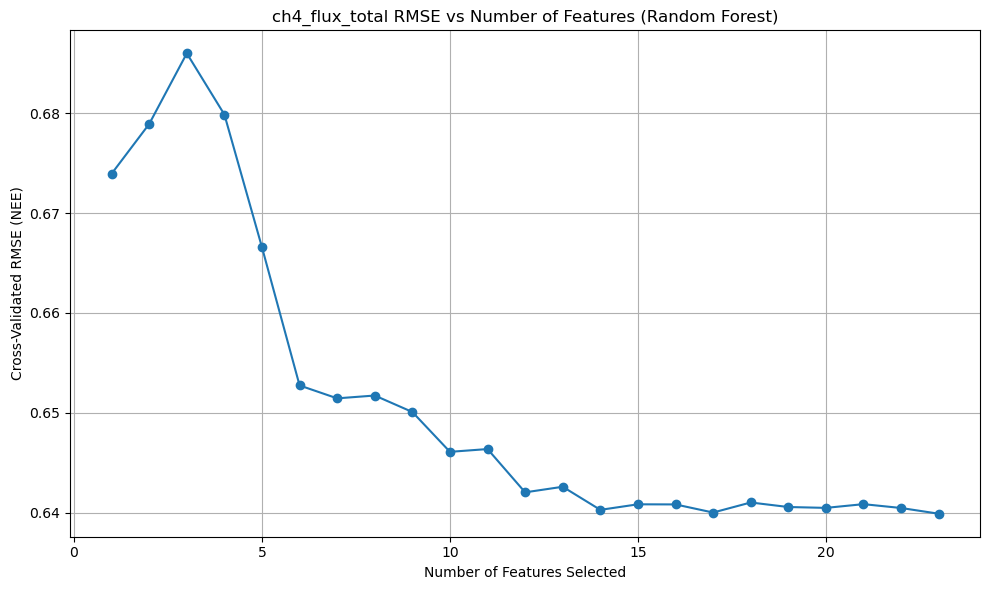

Optimal number of features: 23
Selected features: ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad', 'tmean_C', 'vap', 'vs', 'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm', 'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm', 'silt_0_100cm', 'soc_0_100cm', 'co2_cont']


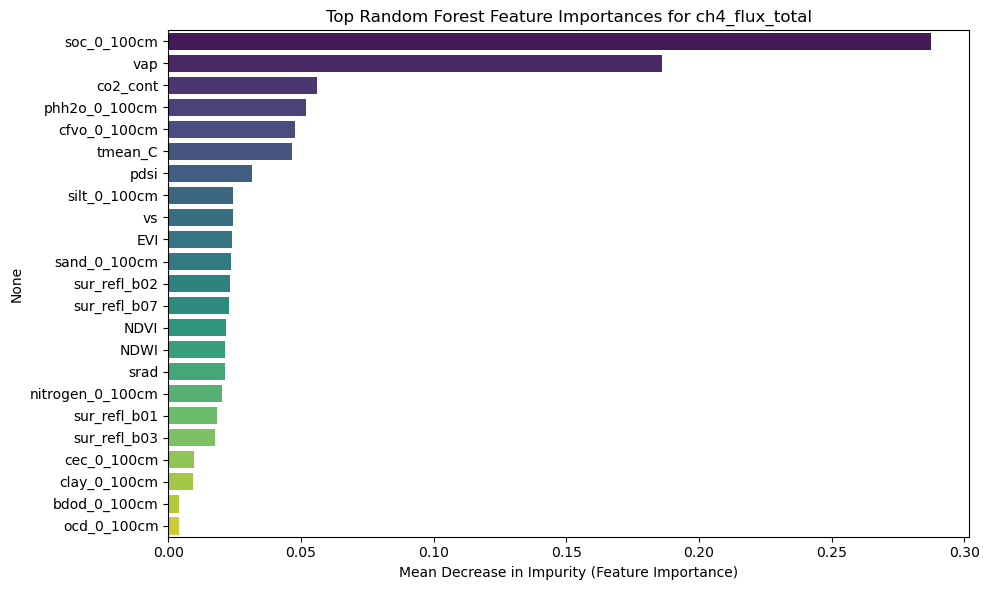

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
# --- CHANGE 1: Import root_mean_squared_error instead of mean_squared_error ---
from sklearn.metrics import make_scorer, root_mean_squared_error
import warnings
import os
warnings.filterwarnings('ignore')


# 1. Load your dataset
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")
df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_var = 'ch4_flux_total'

out_path = os.path.join("/explore/nobackup/people/spotter5/anna_v/v2/loocv", target_var)
os.makedirs(out_path, exist_ok = True)

# 4. Drop rows with missing predictor or target values
df_model = df[predictor_vars + [target_var]].dropna()

# 5. Prepare input data
X = df_model[predictor_vars]
y = df_model[target_var]

# 6. Set up scoring, model, and cross-validation
# --- CHANGE 2: Use the new function to create the scorer ---
# Since RMSE is an error metric (lower is better), we set greater_is_better=False
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 7. Run RFECV
rfecv = RFECV(estimator=rf, step=1, cv=cv, scoring=rmse_scorer, n_jobs=-1)
rfecv.fit(X, y)

# 8. Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
    # Note: RFECV stores scores, so we negate our scorer's output to plot positive RMSE
    -rfecv.cv_results_['mean_test_score'],
    marker='o'
)
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated RMSE (NEE)")
plt.title(f"{target_var} RMSE vs Number of Features (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(out_path, 'rfe.png'))
plt.show()

# 9. Print selected features
selected_features = list(X.columns[rfecv.support_])
print("Optimal number of features:", rfecv.n_features_)
print("Selected features:", selected_features)

# 10. Train full model and compute feature importances
full_rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
full_rf.fit(X, y)
full_importances = pd.Series(full_rf.feature_importances_, index=X.columns)
top_10_features = full_importances.sort_values(ascending=False).head(40)

# 11. Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.xlabel("Mean Decrease in Impurity (Feature Importance)")
plt.title(f"Top Random Forest Feature Importances for {target_var}")
plt.savefig(os.path.join(out_path, 'rf_importance.png'))
plt.tight_layout()
plt.show()

GPP 10-fold CV XGboost dummy variables for LC

In [3]:
import os
import warnings
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# Suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::FutureWarning'
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load your dataset
# Using a placeholder path; replace with your actual file path
file_path = "/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv"

df = pd.read_csv(file_path)


df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont', 'ALT']

target_var = 'gpp'

# 3. Drop rows only if the target variable is missing
# XGBoost can handle missing values (NaN) in the predictor variables internally.
# This approach preserves more data for training.
df_model = df.dropna(subset=[target_var])

# 4. One-hot encode land_cover
# get_dummies will handle any potential NaNs in 'land_cover' by creating a row of all zeros for that observation.
df_dummies = pd.get_dummies(df_model['land_cover'], prefix='bawld')
X = pd.concat([df_model[predictor_vars], df_dummies], axis=1)
y = df_model[target_var]

# Ensure all column names are strings for XGBoost compatibility
X.columns = [str(col) for col in X.columns]

# 5. Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'n_estimators': [500]
}

# 6. Model and 10-fold CV
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 7. Grid search (optimize RMSE)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X, y)

# 8. Metrics
best_rmse = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"✅ Best RMSE: {best_rmse:.3f}")
print("✅ Best Parameters:", best_params)

# 9. R²
r2_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring='r2',
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")

# 10. MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring=mae_scorer,
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV MAE: {-np.mean(mae_scores):.3f} ± {np.std(mae_scores):.3f}")


✅ Best RMSE: 28.030
✅ Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1.0}
✅ 10-Fold CV R²: 0.858 ± 0.012
✅ 10-Fold CV MAE: 15.805 ± 0.486


In [2]:
df.columns

Index(['site_name', 'site_reference', 'latitude', 'longitude', 'flux_method',
       'country', 'land_cover_eco', 'land_cover_plot', 'bawld_class', 'year',
       'month', 'siteID', 'EVI', 'NDVI', 'SummaryQA', 'sur_refl_b01',
       'sur_refl_b02', 'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'aet', 'def',
       'pdsi', 'pet', 'pr', 'ro', 'soil', 'srad', 'swe', 'tmmn', 'tmmx', 'vap',
       'vpd', 'vs', 'nee', 'gpp', 'reco', 'ch4_flux_total', 'bdod_0_100cm',
       'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm', 'nitrogen_0_100cm',
       'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm', 'silt_0_100cm',
       'soc_0_100cm', 'land_cover', 'co2_cont', 'tmean_C', 'date'],
      dtype='object')

In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::FutureWarning'
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load your dataset
file_path = "/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv"
df = pd.read_csv(file_path)

df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
feature_cols = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont', 'ALT']

target_col = 'gpp'

# Drop rows only if the target variable or site_reference is missing.
# XGBoost will handle missing values in the predictor (feature_cols) variables.
df = df.dropna(subset=['site_reference', target_col])


# Define output path and create directory
out_path = os.path.join("/explore/nobackup/people/spotter5/anna_v/v2/loocv", target_col)

os.makedirs(out_path, exist_ok = True)

# One-hot encode 'land_cover'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
bawld_encoded = encoder.fit_transform(df[['land_cover']])
bawld_cols = encoder.get_feature_names_out(['land_cover'])
bawld_df = pd.DataFrame(bawld_encoded, columns=bawld_cols, index=df.index)

# Combine features
X = pd.concat([df[feature_cols], bawld_df], axis=1)
y = df[target_col]
sites = df["site_reference"].unique()

results = []
all_preds_df_list = []

# Leave-One-Site-Out CV
for test_site in sites:
    train_idx = df["site_reference"] != test_site
    test_idx = df["site_reference"] == test_site

    if test_idx.sum() < 1:
        continue

    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]
    dates_test = df.loc[test_idx, "date"]

    model = XGBRegressor(
        n_estimators=700,
        learning_rate=0.01,
        max_depth=3,
        n_jobs=-1,
        subsample = 0.7,
        random_state=42,
        # verbosity=0 # Muted to see potential XGBoost warnings
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    site_df = pd.DataFrame({
        "Site": test_site,
        "Date": dates_test.values,
        "Observed": y_test.values,
        "Predicted": y_pred
    })
    all_preds_df_list.append(site_df)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Site": test_site,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

# Combine results
results_df = pd.DataFrame(results)
all_preds_df = pd.concat(all_preds_df_list, ignore_index=True)

# Save to disk with '_nan' suffix
results_df.to_csv(os.path.join(out_path, f'xgb_results_{target_col}_nan.csv'), index=False)
all_preds_df.to_csv(os.path.join(out_path, f'xgb_predictions_{target_col}_nan.csv'), index=False)

# Pooled metrics
rmse_all = np.sqrt(mean_squared_error(all_preds_df["Observed"], all_preds_df["Predicted"]))
r2_all = r2_score(all_preds_df["Observed"], all_preds_df["Predicted"])
mae_all = mean_absolute_error(all_preds_df["Observed"], all_preds_df["Predicted"])

print("--- Site-Specific Results ---")
print(results_df)
print("\n--- Pooled Metrics ---")
print(f"Pooled RMSE: {rmse_all:.4f}")
print(f"Pooled MAE:  {mae_all:.4f}")
print(f"Pooled R²:   {r2_all:.4f}")

# Median metrics across sites
median_rmse = results_df["RMSE"].median()
median_mae = results_df["MAE"].median()
median_r2 = results_df["R2"].median()

print("\n--- Median Metrics Across Sites ---")
print(f"Median RMSE: {median_rmse:.4f}")
print(f"Median MAE:  {median_mae:.4f}")
print(f"Median R²:   {median_r2:.4f}")


# --- Plotting ---
unique_sites = all_preds_df["Site"].unique()
if not unique_sites.any():
    print("\nNo sites to plot.")
else:
    ncols = 3
    nrows = int(np.ceil(len(unique_sites) / ncols))
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows), sharex=False, sharey=True)
    axs = axs.flatten()

    for i, site in enumerate(unique_sites):
        site_df = all_preds_df[all_preds_df["Site"] == site].sort_values("Date")
        site_metrics = results_df[results_df["Site"] == site].iloc[0]
        rmse_val = round(site_metrics["RMSE"], 2)
        r2_val = round(site_metrics["R2"], 2)
        mae_val = round(site_metrics["MAE"], 2)

        ax = axs[i]
        ax.plot(site_df["Date"], site_df["Observed"], label="Observed", marker="o", linestyle='-', markersize=4)
        ax.plot(site_df["Date"], site_df["Predicted"], label="Predicted", marker="x", linestyle='--', markersize=4)
        ax.set_title(site)
        ax.set_xlabel("Date")
        ax.set_ylabel(target_col)
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

        # Add metrics text to the plot
        textstr = f"RMSE: {rmse_val}\nMAE: {mae_val}\nR²: {r2_val}"
        ax.text(
            0.97, 0.03, textstr,
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

    # Remove extra (empty) axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle(f"XGBoost: Observed vs Predicted {target_col} per Site (Leave-One-Site-Out CV)", fontsize=18, y=1.0)
    fig.tight_layout(rect=[0, 0, 1, 0.97])

    # Save the figure with '_nan' suffix
    plot_path = os.path.join(out_path, f'xgb_{target_col}_loso_timeseries_nan.png')
    plt.savefig(plot_path, dpi=300)
    print(f"\nTime series plot saved to: {plot_path}")
    plt.show()


/home/spotter5/.conda/envs/xgboost_gpu/lib/python3.9/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/spotter5/.conda/envs/xgboost_gpu/lib/python3.9/site-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [16]:
print(f"Pooled RMSE: {rmse_all:.4f}")
print(f"Pooled MAE:  {mae_all:.4f}")
print(f"Pooled R²:   {r2_all:.4f}")

# Median metrics across sites
median_rmse = results_df["RMSE"].median()
median_mae = results_df["MAE"].median()
median_r2 = results_df["R2"].median()

print("\n--- Median Metrics Across Sites ---")
print(f"Median RMSE: {median_rmse:.4f}")
print(f"Median MAE:  {median_mae:.4f}")
print(f"Median R²:   {median_r2:.4f}")


Pooled RMSE: 38.8510
Pooled MAE:  23.6934
Pooled R²:   0.7278

--- Median Metrics Across Sites ---
Median RMSE: 27.8884
Median MAE:  19.2238
Median R²:   0.6918


In [14]:
df.shape

(9824, 53)

NEE 10-fold CV XGboost dummy variables for LC

In [17]:
import os
import warnings
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# Suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::FutureWarning'
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load your dataset
# Using a placeholder path; replace with your actual file path
file_path = "/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv"

df = pd.read_csv(file_path)


df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont', 'ALT']

target_var = 'nee'

# 3. Drop rows only if the target variable is missing
# XGBoost can handle missing values (NaN) in the predictor variables internally.
# This approach preserves more data for training.
df_model = df.dropna(subset=[target_var])

# 4. One-hot encode land_cover
# get_dummies will handle any potential NaNs in 'land_cover' by creating a row of all zeros for that observation.
df_dummies = pd.get_dummies(df_model['land_cover'], prefix='bawld')
X = pd.concat([df_model[predictor_vars], df_dummies], axis=1)
y = df_model[target_var]

# Ensure all column names are strings for XGBoost compatibility
X.columns = [str(col) for col in X.columns]

# 5. Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'n_estimators': [500]
}

# 6. Model and 10-fold CV
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 7. Grid search (optimize RMSE)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X, y)

# 8. Metrics
best_rmse = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"✅ Best RMSE: {best_rmse:.3f}")
print("✅ Best Parameters:", best_params)

# 9. R²
r2_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring='r2',
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")

# 10. MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring=mae_scorer,
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV MAE: {-np.mean(mae_scores):.3f} ± {np.std(mae_scores):.3f}")


✅ Best RMSE: 17.273
✅ Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1.0}
✅ 10-Fold CV R²: 0.692 ± 0.023
✅ 10-Fold CV MAE: 10.687 ± 0.377


In [ ]:
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::FutureWarning'
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load your dataset
file_path = "/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv"
df = pd.read_csv(file_path)

df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
feature_cols = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont', 'ALT']

target_col = 'nee'

# Drop rows only if the target variable or site_reference is missing.
# XGBoost will handle missing values in the predictor (feature_cols) variables.
df = df.dropna(subset=['site_reference', target_col])


# Define output path and create directory
out_path = os.path.join("/explore/nobackup/people/spotter5/anna_v/v2/loocv", target_col)

os.makedirs(out_path, exist_ok = True)

# One-hot encode 'land_cover'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
bawld_encoded = encoder.fit_transform(df[['land_cover']])
bawld_cols = encoder.get_feature_names_out(['land_cover'])
bawld_df = pd.DataFrame(bawld_encoded, columns=bawld_cols, index=df.index)

# Combine features
X = pd.concat([df[feature_cols], bawld_df], axis=1)
y = df[target_col]
sites = df["site_reference"].unique()

results = []
all_preds_df_list = []

# Leave-One-Site-Out CV
for test_site in sites:
    train_idx = df["site_reference"] != test_site
    test_idx = df["site_reference"] == test_site

    if test_idx.sum() < 1:
        continue

    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]
    dates_test = df.loc[test_idx, "date"]

    model = XGBRegressor(
        n_estimators=700,
        learning_rate=0.01,
        max_depth=3,
        n_jobs=-1,
        subsample = 0.7,
        random_state=42,
        # verbosity=0 # Muted to see potential XGBoost warnings
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    site_df = pd.DataFrame({
        "Site": test_site,
        "Date": dates_test.values,
        "Observed": y_test.values,
        "Predicted": y_pred
    })
    all_preds_df_list.append(site_df)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Site": test_site,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

# Combine results
results_df = pd.DataFrame(results)
all_preds_df = pd.concat(all_preds_df_list, ignore_index=True)

# Save to disk with '_nan' suffix
results_df.to_csv(os.path.join(out_path, f'xgb_results_{target_col}_nan.csv'), index=False)
all_preds_df.to_csv(os.path.join(out_path, f'xgb_predictions_{target_col}_nan.csv'), index=False)

# Pooled metrics
rmse_all = np.sqrt(mean_squared_error(all_preds_df["Observed"], all_preds_df["Predicted"]))
r2_all = r2_score(all_preds_df["Observed"], all_preds_df["Predicted"])
mae_all = mean_absolute_error(all_preds_df["Observed"], all_preds_df["Predicted"])

print("--- Site-Specific Results ---")
print(results_df)
print("\n--- Pooled Metrics ---")
print(f"Pooled RMSE: {rmse_all:.4f}")
print(f"Pooled MAE:  {mae_all:.4f}")
print(f"Pooled R²:   {r2_all:.4f}")

# Median metrics across sites
median_rmse = results_df["RMSE"].median()
median_mae = results_df["MAE"].median()
median_r2 = results_df["R2"].median()

print("\n--- Median Metrics Across Sites ---")
print(f"Median RMSE: {median_rmse:.4f}")
print(f"Median MAE:  {median_mae:.4f}")
print(f"Median R²:   {median_r2:.4f}")


# --- Plotting ---
unique_sites = all_preds_df["Site"].unique()
if not unique_sites.any():
    print("\nNo sites to plot.")
else:
    ncols = 3
    nrows = int(np.ceil(len(unique_sites) / ncols))
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows), sharex=False, sharey=True)
    axs = axs.flatten()

    for i, site in enumerate(unique_sites):
        site_df = all_preds_df[all_preds_df["Site"] == site].sort_values("Date")
        site_metrics = results_df[results_df["Site"] == site].iloc[0]
        rmse_val = round(site_metrics["RMSE"], 2)
        r2_val = round(site_metrics["R2"], 2)
        mae_val = round(site_metrics["MAE"], 2)

        ax = axs[i]
        ax.plot(site_df["Date"], site_df["Observed"], label="Observed", marker="o", linestyle='-', markersize=4)
        ax.plot(site_df["Date"], site_df["Predicted"], label="Predicted", marker="x", linestyle='--', markersize=4)
        ax.set_title(site)
        ax.set_xlabel("Date")
        ax.set_ylabel(target_col)
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

        # Add metrics text to the plot
        textstr = f"RMSE: {rmse_val}\nMAE: {mae_val}\nR²: {r2_val}"
        ax.text(
            0.97, 0.03, textstr,
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

    # Remove extra (empty) axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle(f"XGBoost: Observed vs Predicted {target_col} per Site (Leave-One-Site-Out CV)", fontsize=18, y=1.0)
    fig.tight_layout(rect=[0, 0, 1, 0.97])

    # Save the figure with '_nan' suffix
    plot_path = os.path.join(out_path, f'xgb_{target_col}_loso_timeseries_nan.png')
    plt.savefig(plot_path, dpi=300)
    print(f"\nTime series plot saved to: {plot_path}")
    plt.show()


RECO 10-fold CV XGboost dummy variables for LC

In [17]:
import os
import warnings
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# Suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::FutureWarning'
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load your dataset
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")
df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_var = 'reco'

# 3. Drop rows with missing values in predictors, target, or 'land_cover'
df_model = df[predictor_vars + ['land_cover', target_var]].dropna()

# 4. One-hot encode land_cover
df_dummies = pd.get_dummies(df_model['land_cover'], prefix='bawld')
X = pd.concat([df_model[predictor_vars], df_dummies], axis=1)
y = df_model[target_var]

# 5. Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'n_estimators': [500]
}

# 6. Model and 10-fold CV
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 7. Grid search (optimize RMSE)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X, y)

# 8. Metrics
best_rmse = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"✅ Best RMSE: {best_rmse:.3f}")
print("✅ Best Parameters:", best_params)

# 9. R²
r2_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring='r2',
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")

# 10. MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring=mae_scorer,
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV MAE: {-np.mean(mae_scores):.3f} ± {np.std(mae_scores):.3f}")


✅ Best RMSE: 21.614
✅ Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1.0}
✅ 10-Fold CV R²: 0.795 ± 0.036
✅ 10-Fold CV MAE: 13.520 ± 0.664


--- Site-Specific Results ---
                                                  Site       RMSE        MAE  \
0    Saskatchewan - Western Boreal, Mature Aspen_CA...  60.478031  45.209760   
1    Saskatchewan - Western Boreal, Mature Jack Pin...  16.886313  13.873324   
2    Manitoba - Northern Old Black Spruce (former B...  28.367996  17.058143   
3    Saskatchewan - Western Boreal, Mature Black Sp...  40.292019  32.375393   
4                                Kaamanen_FI-Kaa_tower  18.000011  16.086713   
..                                                 ...        ...        ...   
112               Cambridge Bay - Mesic_CB-mesic_tower  12.782983  11.560026   
113                                Igarka_RU-Iga_tower  66.618408  55.192777   
114                        Iqaluit Tundra_CA-IQ1_tower  14.148446  12.075256   
115                       Churchill Fen 3_CA-CF3_tower  27.853208  24.569876   
116      Mittimatalik (Pond Inlet) Tundra_CA-Mtk_tower   7.980041   6.603988   

         

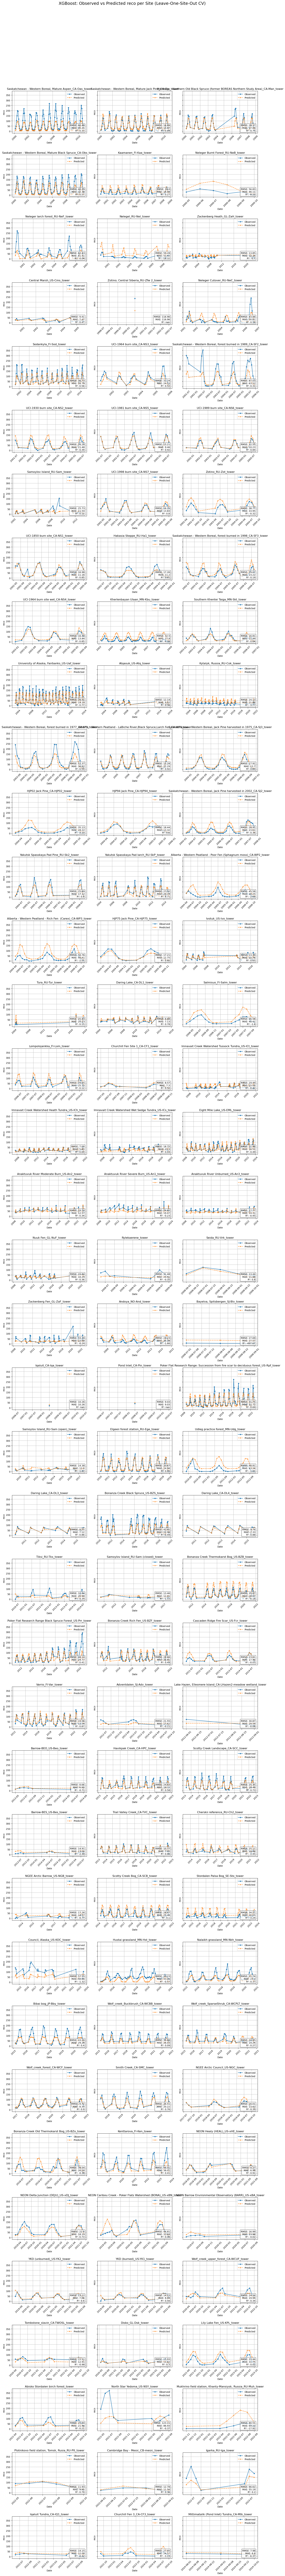

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import os # Added the missing import

# Load data
# 1. Load your dataset
# Make sure to replace this with the actual path to your data

df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")

df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
feature_cols = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_col = 'reco'
df = df.dropna(subset=['site_reference', 'date'] + feature_cols + ['land_cover', target_col])

# Define output path and create directory
out_path = os.path.join("./results", target_col) # Changed to a local path
os.makedirs(out_path, exist_ok = True)

# One-hot encode 'land_cover'
# FIX: Changed 'sparse' to 'sparse_output'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
bawld_encoded = encoder.fit_transform(df[['land_cover']])
bawld_cols = encoder.get_feature_names_out(['land_cover'])
bawld_df = pd.DataFrame(bawld_encoded, columns=bawld_cols, index=df.index)

# Combine features
X = pd.concat([df[feature_cols], bawld_df], axis=1)
y = df[target_col]
sites = df["site_reference"].unique()

results = []
all_preds_df_list = []

# Leave-One-Site-Out CV
for test_site in sites:
    train_idx = df["site_reference"] != test_site
    test_idx = df["site_reference"] == test_site

    if test_idx.sum() < 1:
        continue

    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]
    dates_test = df.loc[test_idx, "date"]

    model = XGBRegressor(
        n_estimators=700,
        learning_rate=0.01,
        max_depth=3,
        n_jobs=-1,
        subsample = 0.7,
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    site_df = pd.DataFrame({
        "Site": test_site,
        "Date": dates_test.values,
        "Observed": y_test.values,
        "Predicted": y_pred
    })
    all_preds_df_list.append(site_df)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Site": test_site,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

# Combine results
results_df = pd.DataFrame(results)
all_preds_df = pd.concat(all_preds_df_list, ignore_index=True)

# Save to disk
results_df.to_csv(os.path.join(out_path, f'xgb_results_{target_col}.csv'), index=False)
all_preds_df.to_csv(os.path.join(out_path, f'xgb_predictions_{target_col}.csv'), index=False)

# Pooled metrics
rmse_all = np.sqrt(mean_squared_error(all_preds_df["Observed"], all_preds_df["Predicted"]))
r2_all = r2_score(all_preds_df["Observed"], all_preds_df["Predicted"])
mae_all = mean_absolute_error(all_preds_df["Observed"], all_preds_df["Predicted"])

print("--- Site-Specific Results ---")
print(results_df)
print("\n--- Pooled Metrics ---")
print(f"Pooled RMSE: {rmse_all:.4f}")
print(f"Pooled MAE:  {mae_all:.4f}")
print(f"Pooled R²:   {r2_all:.4f}")

# Median metrics across sites
median_rmse = results_df["RMSE"].median()
median_mae = results_df["MAE"].median()
median_r2 = results_df["R2"].median()

print("\n--- Median Metrics Across Sites ---")
print(f"Median RMSE: {median_rmse:.4f}")
print(f"Median MAE:  {median_mae:.4f}")
print(f"Median R²:   {median_r2:.4f}")


# --- Plotting ---
unique_sites = all_preds_df["Site"].unique()
if not unique_sites.any():
    print("\nNo sites to plot.")
else:
    ncols = 3
    nrows = int(np.ceil(len(unique_sites) / ncols))
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows), sharex=False, sharey=True)
    axs = axs.flatten()

    for i, site in enumerate(unique_sites):
        site_df = all_preds_df[all_preds_df["Site"] == site].sort_values("Date")
        site_metrics = results_df[results_df["Site"] == site].iloc[0]
        rmse_val = round(site_metrics["RMSE"], 2)
        r2_val = round(site_metrics["R2"], 2)
        mae_val = round(site_metrics["MAE"], 2)

        ax = axs[i]
        ax.plot(site_df["Date"], site_df["Observed"], label="Observed", marker="o", linestyle='-', markersize=4)
        ax.plot(site_df["Date"], site_df["Predicted"], label="Predicted", marker="x", linestyle='--', markersize=4)
        ax.set_title(site)
        ax.set_xlabel("Date")
        ax.set_ylabel(target_col)
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

        # Add metrics text to the plot
        textstr = f"RMSE: {rmse_val}\nMAE: {mae_val}\nR²: {r2_val}"
        ax.text(
            0.97, 0.03, textstr,
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

    # Remove extra (empty) axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle(f"XGBoost: Observed vs Predicted {target_col} per Site (Leave-One-Site-Out CV)", fontsize=18, y=1.0)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Save the figure
    plot_path = os.path.join(out_path, f'xgb_{target_col}_loso_timeseries.png')
    plt.savefig(plot_path, dpi=300)
    print(f"\nTime series plot saved to: {plot_path}")
    plt.show()



CH4 10-fold CV XGboost dummy variables for LC

In [19]:
import os
import warnings
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer

# Suppress warnings
os.environ['PYTHONWARNINGS'] = 'ignore::FutureWarning'
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Load your dataset
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")
df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
predictor_vars = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_var = 'ch4_flux_total'

# 3. Drop rows with missing values in predictors, target, or 'land_cover'
df_model = df[predictor_vars + ['land_cover', target_var]].dropna()

# 4. One-hot encode land_cover
df_dummies = pd.get_dummies(df_model['land_cover'], prefix='bawld')
X = pd.concat([df_model[predictor_vars], df_dummies], axis=1)
y = df_model[target_var]

# 5. Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'n_estimators': [500]
}

# 6. Model and 10-fold CV
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 7. Grid search (optimize RMSE)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X, y)

# 8. Metrics
best_rmse = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"✅ Best RMSE: {best_rmse:.3f}")
print("✅ Best Parameters:", best_params)

# 9. R²
r2_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring='r2',
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV R²: {np.mean(r2_scores):.3f} ± {np.std(r2_scores):.3f}")

# 10. MAE
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(
    grid_search.best_estimator_,
    X,
    y,
    scoring=mae_scorer,
    cv=cv,
    n_jobs=-1
)
print(f"✅ 10-Fold CV MAE: {-np.mean(mae_scores):.3f} ± {np.std(mae_scores):.3f}")


✅ Best RMSE: 0.575
✅ Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
✅ 10-Fold CV R²: 0.539 ± 0.118
✅ 10-Fold CV MAE: 0.341 ± 0.035


--- Site-Specific Results ---
                                                 Site      RMSE       MAE  \
0                          Central Marsh_US-Cms_tower  0.287867  0.238324   
1                        Kytalyk, Russia_RU-Cok_tower  1.081738  0.880416   
2                          Lompolojankka_FI-Lom_tower  1.085058  0.774324   
3                                   Rylekaerene_tower  1.644201  1.222087   
4                                  Seida_RU-Vrk_tower  1.096956  1.014579   
5                   Churchill Fen Site 2_CA-CF2_tower  0.553156  0.485341   
6        University of Alaska, Fairbanks_US-Uaf_tower  0.934349  0.842740   
7                          Stordalen Fen_SE-St1_tower  2.398101  2.142899   
8                 Scotty Creek Landscape_CA-SCC_tower  0.275883  0.198666   
9                     NGEE Arctic Barrow_US-NGB_tower  0.219514  0.158372   
10                    Trail Valley Creek_CA-TVC_tower  0.692866  0.652410   
11                    Cherskii reference_RU-Ch

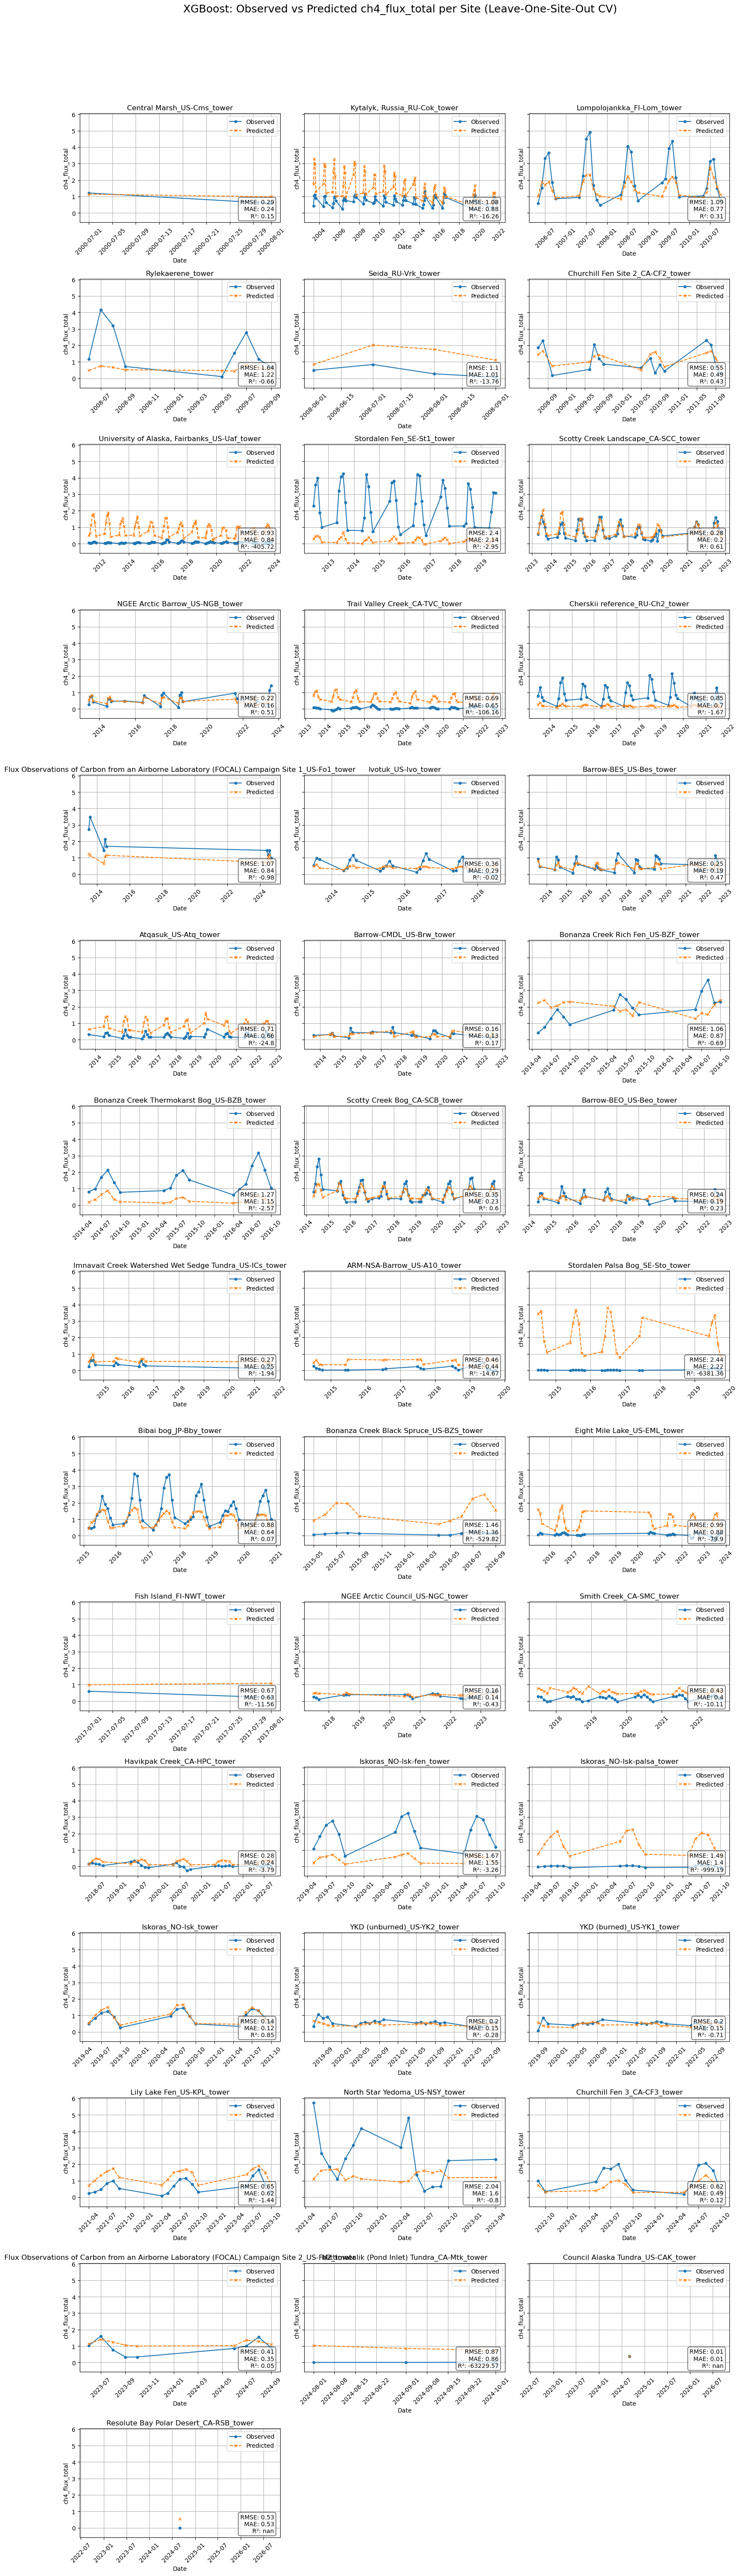

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import os # Added the missing import

# Load data
# 1. Load your dataset
# Make sure to replace this with the actual path to your data

df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_alt_soil_lc_co2.csv")

df = df[df['flux_method'] == 'EC']

# 2. Create tmean_C and date
df['tmean_C'] = df[['tmmn', 'tmmx']].mean(axis=1)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 3. Define predictors and target
feature_cols = ['EVI', 'NDVI', 'sur_refl_b01', 'sur_refl_b02',
    'sur_refl_b03', 'sur_refl_b07', 'NDWI', 'pdsi', 'srad',
    'tmean_C', 'vap', 'vs',
    'bdod_0_100cm', 'cec_0_100cm', 'cfvo_0_100cm', 'clay_0_100cm',
    'nitrogen_0_100cm', 'ocd_0_100cm', 'phh2o_0_100cm', 'sand_0_100cm',
    'silt_0_100cm', 'soc_0_100cm', 'co2_cont']

target_col = 'ch4_flux_total'
df = df.dropna(subset=['site_reference', 'date'] + feature_cols + ['land_cover', target_col])

# Define output path and create directory
out_path = os.path.join("./results", target_col) # Changed to a local path
os.makedirs(out_path, exist_ok = True)

# One-hot encode 'land_cover'
# FIX: Changed 'sparse' to 'sparse_output'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
bawld_encoded = encoder.fit_transform(df[['land_cover']])
bawld_cols = encoder.get_feature_names_out(['land_cover'])
bawld_df = pd.DataFrame(bawld_encoded, columns=bawld_cols, index=df.index)

# Combine features
X = pd.concat([df[feature_cols], bawld_df], axis=1)
y = df[target_col]
sites = df["site_reference"].unique()

results = []
all_preds_df_list = []

# Leave-One-Site-Out CV
for test_site in sites:
    train_idx = df["site_reference"] != test_site
    test_idx = df["site_reference"] == test_site

    if test_idx.sum() < 1:
        continue

    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]
    dates_test = df.loc[test_idx, "date"]

    model = XGBRegressor(
        n_estimators=700,
        learning_rate=0.01,
        max_depth=3,
        n_jobs=-1,
        subsample = 0.7,
        random_state=42,
        verbosity=0
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    site_df = pd.DataFrame({
        "Site": test_site,
        "Date": dates_test.values,
        "Observed": y_test.values,
        "Predicted": y_pred
    })
    all_preds_df_list.append(site_df)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        "Site": test_site,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

# Combine results
results_df = pd.DataFrame(results)
all_preds_df = pd.concat(all_preds_df_list, ignore_index=True)

# Save to disk
results_df.to_csv(os.path.join(out_path, f'xgb_results_{target_col}.csv'), index=False)
all_preds_df.to_csv(os.path.join(out_path, f'xgb_predictions_{target_col}.csv'), index=False)

# Pooled metrics
rmse_all = np.sqrt(mean_squared_error(all_preds_df["Observed"], all_preds_df["Predicted"]))
r2_all = r2_score(all_preds_df["Observed"], all_preds_df["Predicted"])
mae_all = mean_absolute_error(all_preds_df["Observed"], all_preds_df["Predicted"])

print("--- Site-Specific Results ---")
print(results_df)
print("\n--- Pooled Metrics ---")
print(f"Pooled RMSE: {rmse_all:.4f}")
print(f"Pooled MAE:  {mae_all:.4f}")
print(f"Pooled R²:   {r2_all:.4f}")

# Median metrics across sites
median_rmse = results_df["RMSE"].median()
median_mae = results_df["MAE"].median()
median_r2 = results_df["R2"].median()

print("\n--- Median Metrics Across Sites ---")
print(f"Median RMSE: {median_rmse:.4f}")
print(f"Median MAE:  {median_mae:.4f}")
print(f"Median R²:   {median_r2:.4f}")


# --- Plotting ---
unique_sites = all_preds_df["Site"].unique()
if not unique_sites.any():
    print("\nNo sites to plot.")
else:
    ncols = 3
    nrows = int(np.ceil(len(unique_sites) / ncols))
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows), sharex=False, sharey=True)
    axs = axs.flatten()

    for i, site in enumerate(unique_sites):
        site_df = all_preds_df[all_preds_df["Site"] == site].sort_values("Date")
        site_metrics = results_df[results_df["Site"] == site].iloc[0]
        rmse_val = round(site_metrics["RMSE"], 2)
        r2_val = round(site_metrics["R2"], 2)
        mae_val = round(site_metrics["MAE"], 2)

        ax = axs[i]
        ax.plot(site_df["Date"], site_df["Observed"], label="Observed", marker="o", linestyle='-', markersize=4)
        ax.plot(site_df["Date"], site_df["Predicted"], label="Predicted", marker="x", linestyle='--', markersize=4)
        ax.set_title(site)
        ax.set_xlabel("Date")
        ax.set_ylabel(target_col)
        ax.legend()
        ax.grid(True)
        ax.tick_params(axis='x', rotation=45)

        # Add metrics text to the plot
        textstr = f"RMSE: {rmse_val}\nMAE: {mae_val}\nR²: {r2_val}"
        ax.text(
            0.97, 0.03, textstr,
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='bottom',
            horizontalalignment='right',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
        )

    # Remove extra (empty) axes
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    fig.suptitle(f"XGBoost: Observed vs Predicted {target_col} per Site (Leave-One-Site-Out CV)", fontsize=18, y=1.0)
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    # Save the figure
    plot_path = os.path.join(out_path, f'xgb_{target_col}_loso_timeseries.png')
    plt.savefig(plot_path, dpi=300)
    print(f"\nTime series plot saved to: {plot_path}")
    plt.show()



In [1]:
import pandas as pd
import geopandas as gpd

# # --- Configuration ---
# UPDATE this with the actual path to your input CSV file
input_csv_path = "/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_data_v5.csv"
# UPDATE this with the desired path for your output shapefile
output_shapefile_path = "/explore/nobackup/people/spotter5/anna_v/v2/v2_model_sites.shp"

# --- Main Script ---

try:
    # 1. Read the CSV file into a Pandas DataFrame
    print(f"Reading data from: {input_csv_path}")
    df = pd.read_csv(input_csv_path)

    # 2. Define the columns to keep
    columns_to_keep = ['site_reference', 'latitudelongitude']
    
    # It seems 'latitude' and 'longitude' are in a single column. Let's split it.
    # If they are separate columns already, you can adjust this part.
    # Assuming the format is "latitude,longitude"
    if 'latitudelongitude' in df.columns:
        # print("Splitting 'latitudelongitude' column into 'latitude' and 'longitude'...")
        # df[['latitude', 'longitude']] = df['latitudelongitude'].astype(str).str.split(',', expand=True)
        
        # Convert new columns to numeric, coercing errors
        df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
        df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
        
        # Drop rows where conversion failed
        df.dropna(subset=['latitude', 'longitude'], inplace=True)
        
        columns_to_keep = ['site_reference', 'latitude', 'longitude']
    else:
        # If you have separate 'latitude' and 'longitude' columns already
        columns_to_keep = ['site_reference', 'latitude', 'longitude']


    print(f"Selecting columns: {columns_to_keep}")
    sites_df = df[columns_to_keep].copy()

    # 3. Drop duplicate rows to get unique sites
    print(f"Original number of rows: {len(sites_df)}")
    sites_df.drop_duplicates(inplace=True)
    print(f"Number of unique sites after dropping duplicates: {len(sites_df)}")

    # 4. Create a GeoDataFrame
    # The geometry is created from the longitude and latitude columns
    print("Converting Pandas DataFrame to GeoPandas GeoDataFrame...")
    gdf = gpd.GeoDataFrame(
        sites_df,
        geometry=gpd.points_from_xy(sites_df.longitude, sites_df.latitude)
    )

    # 5. Set the Coordinate Reference System (CRS)
    # WGS84 (EPSG:4326) is the standard for latitude/longitude data
    print("Setting Coordinate Reference System (CRS) to EPSG:4326 (WGS84)...")
    gdf.set_crs(epsg=4326, inplace=True)

    # 6. Save the GeoDataFrame to a shapefile
    print(f"Saving GeoDataFrame to shapefile: {output_shapefile_path}")
    gdf.to_file(output_shapefile_path, driver='ESRI Shapefile')

    print("\nProcessing complete!")
    print(f"Shapefile '{output_shapefile_path}' created successfully.")
    print("\nFirst 5 rows of the final GeoDataFrame:")
    print(gdf.head())

except FileNotFoundError:
    print(f"Error: The file was not found at '{input_csv_path}'. Please update the path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



Reading data from: /explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_data_v5.csv
An unexpected error occurred: name 'pd' is not defined


In [22]:
df = pd.read_csv(input_csv_path)

df.columns

NameError: name 'input_csv_path' is not defined

In [ ]:
input_data = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_data.csv")

input_data

In [6]:
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_sites.shp")

# Count the occurrences of each site in the 'site_reference' column
site_counts = gdf['site_refer'].value_counts()

# Filter to find which sites appear more than once
duplicate_sites = site_counts[site_counts > 1]

# Print the results
if duplicate_sites.empty:
    print("✅ All sites appear only once.")
else:
    print("🚨 Found sites with more than 1 count:")
    print(duplicate_sites)

🚨 Found sites with more than 1 count:
Saskatchewan - Western Boreal, Mature Jack Pine_CA-Ojp_tower    3
Yakutsk Spasskaya Pad larch_RU-SkP_tower                        3
Kilpisjarvi_chamber_523_chamber                                 2
Stordalen_StordalenSE5_agg_chamber                              2
Lompolojankka_FI-Lom_tower                                      2
                                                               ..
Storflaket_StorflaketSE6_agg_chamber                            2
Stordalen_StordalenDL4_agg_chamber                              2
Storflaket_StorflaketPBS2_agg_chamber                           2
Storflaket_StorflaketSE3_agg_chamber                            2
Storflaket_StorflaketSE7_agg_chamber                            2
Name: site_refer, Length: 177, dtype: int64


In [5]:
import pandas as pd
df = pd.read_csv("/explore/nobackup/people/spotter5/anna_v/v2/v2_model_training_data_v2.csv")

columns_to_keep = ['site_reference', 'year', 'month', 'latitude', 'longitude', 'nee']


print(f"Selecting columns: {columns_to_keep}")
sites_df = df[columns_to_keep].copy()

sites_df = sites_df[sites_df['site_reference'] == 'Yakutsk Spasskaya Pad larch_RU-SkP_tower']
# sites_df.drop_duplicates(inplace=True)
# sites_df = sites_df[(sites_df['year'] == 2000) & (sites_df['month'] == 7)]
sites_df

Selecting columns: ['site_reference', 'year', 'month', 'latitude', 'longitude', 'nee']


site_reference  year  month   latitude  \
6119    Yakutsk Spasskaya Pad larch_RU-SkP_tower  2000      7  62.255000   
8255    Yakutsk Spasskaya Pad larch_RU-SkP_tower  2000      8  62.255000   
10340   Yakutsk Spasskaya Pad larch_RU-SkP_tower  2000      9  62.255000   
12913   Yakutsk Spasskaya Pad larch_RU-SkP_tower  2001      4  62.255000   
14320   Yakutsk Spasskaya Pad larch_RU-SkP_tower  2001      5  62.255000   
...                                          ...   ...    ...        ...   
510647  Yakutsk Spasskaya Pad larch_RU-SkP_tower  2014      1  62.255674   
512676  Yakutsk Spasskaya Pad larch_RU-SkP_tower  2014      2  62.255674   
514614  Yakutsk Spasskaya Pad larch_RU-SkP_tower  2014      3  62.255674   
518676  Yakutsk Spasskaya Pad larch_RU-SkP_tower  2014     11  62.255674   
520567  Yakutsk Spasskaya Pad larch_RU-SkP_tower  2014     12  62.255674   

        longitude        nee  
6119    129.16800 -72.381282  
8255    129.16800 -66.912474  
10340   129.16800  20.546945  
12913   129.16800   7.782934  
14320   129.16800  20.588454  
...           ...        ...  
510647  129.16824   2.235351  
512676  129.16824  -0.442985  
514614  129.16824  -6.349327  
518676  129.16824  11.213820  
520567  129.16824  11.510920  

[135 rows x 6 columns]